## Set Up

In [1]:
from bs4 import BeautifulSoup
import requests
import json
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
response = requests.get("https://api.census.gov/data/2018/abstcb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F&for=state:15&key=ac3ce060ab950c31fa9aeca20ff5389e4d7d84e7").json()

In [3]:
idk = pd.DataFrame(response[1:],columns=response[0])
idk.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F,state
0,0400000US15,Hawaii,71,"Arts, entertainment, and recreation",001,Total,001,Total,00,Total,001,Total,001,All firms,T5E36R05,Specialized Equipment: Lacked access to requir...,2018,0,D,0.0,D,0,D,0.0,D,0,b,0.0,D,0,D,0.0,D,0.0,D,0.0,D,0.0,D,0.0,D,0.0,D,0.0,D,0.0,D,0.0,D,15
1,0400000US15,Hawaii,71,"Arts, entertainment, and recreation",001,Total,001,Total,00,Total,001,Total,001,All firms,T5E36R06,Specialized Equipment: Laws and regulations,2018,0,None,0.0,None,0,B,0.0,S,0,None,0.0,None,0,None,0.0,None,0.0,None,0.0,None,0.0,S,0.0,S,0.0,None,0.0,None,0.0,None,0.0,None,15
2,0400000US15,Hawaii,71,"Arts, entertainment, and recreation",001,Total,001,Total,00,Total,001,Total,001,All firms,T5E36R07,Specialized Equipment: Concerns regarding safe...,2018,0,None,0.0,None,0,B,0.0,S,0,None,0.0,None,0,None,0.0,None,0.0,None,0.0,None,0.0,S,0.0,S,0.0,None,0.0,None,0.0,None,0.0,None,15
3,0400000US15,Hawaii,31-33,Manufacturing,001,Total,001,Total,00,Total,001,Total,001,All firms,T1E36R01,Artificial Intelligence: Technology was too ex...,2018,64,None,10.2,None,0,T,0.0,S,1230,None,11.1,None,68661,None,15.6,None,41.2,None,5.4,None,0.0,S,0.0,S,17.2,None,14.6,None,5.5,None,31.8,None,15
4,0400000US15,Hawaii,31-33,Manufacturing,001,Total,001,Total,00,Total,001,Total,001,All firms,T1E36R02,Artificial Intelligence: Technology was not ma...,2018,0,D,0.0,D,0,D,0.0,D,0,e,0.0,D,0,D,0.0,D,0.0,D,0.0,D,0.0,D,0.0,D,0.0,D,0.0,D,0.0,D,0.0,D,15


In [4]:
idk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GEO_ID             1155 non-null   object
 1   NAME               1155 non-null   object
 2   NAICS2017          1155 non-null   object
 3   NAICS2017_LABEL    1155 non-null   object
 4   SEX                1155 non-null   object
 5   SEX_LABEL          1155 non-null   object
 6   ETH_GROUP          1155 non-null   object
 7   ETH_GROUP_LABEL    1155 non-null   object
 8   RACE_GROUP         1155 non-null   object
 9   RACE_GROUP_LABEL   1155 non-null   object
 10  VET_GROUP          1155 non-null   object
 11  VET_GROUP_LABEL    1155 non-null   object
 12  NSFSZFI            1155 non-null   object
 13  NSFSZFI_LABEL      1155 non-null   object
 14  FACTORS_P          1155 non-null   object
 15  FACTORS_P_LABEL    1155 non-null   object
 16  YEAR               1155 non-null   object


In [5]:
df_totalsectors = idk[(idk['NAICS2017_LABEL']=='Total for all sectors') & (idk['NSFSZFI_LABEL'] == 'All firms') & (idk['SEX_LABEL'] == 'Total') & (idk['ETH_GROUP_LABEL'] == 'Total') & (idk['RACE_GROUP_LABEL'] == 'Total') & (idk['VET_GROUP_LABEL'] == 'Total')]
df_totalsectors.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F,state
147,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T1E36R01,Artificial Intelligence: Technology was too ex...,2018,1182,None,6.2,None,0,W,0.0,S,29892,None,9.3,None,1467051,None,10.1,None,13.2,None,0.9,None,0.0,S,0.0,S,25.0,None,4.7,None,30.0,None,6.4,None,15
148,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T1E36R02,Artificial Intelligence: Technology was not ma...,2018,373,None,2.0,None,0,W,0.0,S,15804,None,4.9,None,976251,None,6.7,None,28.8,None,1.0,None,0.0,S,0.0,S,15.8,None,7.2,None,21.0,None,8.5,None,15
149,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T1E36R03,Artificial Intelligence: Lacked access to requ...,2018,179,None,0.9,None,0,U,0.0,S,9716,None,3.0,None,533731,None,3.7,None,38.5,None,0.4,None,0.0,S,0.0,S,6.3,None,6.5,None,4.5,None,8.5,None,15
150,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T1E36R04,Artificial Intelligence: Required data not rel...,2018,132,None,0.7,None,0,U,0.0,S,7157,None,2.2,None,332873,None,2.3,None,50.4,None,0.4,None,0.0,S,0.0,S,19.0,None,3.6,None,15.9,None,4.1,None,15
151,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T1E36R05,Artificial Intelligence: Lacked access to requ...,2018,206,None,1.1,None,0,U,0.0,S,10270,None,3.2,None,613264,None,4.2,None,36.8,None,0.7,None,0.0,S,0.0,S,6.1,None,6.6,None,5.6,None,8.8,None,15


In [6]:
len(df_totalsectors)

55

In [7]:
df_totalsectors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 147 to 250
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GEO_ID             55 non-null     object
 1   NAME               55 non-null     object
 2   NAICS2017          55 non-null     object
 3   NAICS2017_LABEL    55 non-null     object
 4   SEX                55 non-null     object
 5   SEX_LABEL          55 non-null     object
 6   ETH_GROUP          55 non-null     object
 7   ETH_GROUP_LABEL    55 non-null     object
 8   RACE_GROUP         55 non-null     object
 9   RACE_GROUP_LABEL   55 non-null     object
 10  VET_GROUP          55 non-null     object
 11  VET_GROUP_LABEL    55 non-null     object
 12  NSFSZFI            55 non-null     object
 13  NSFSZFI_LABEL      55 non-null     object
 14  FACTORS_P          55 non-null     object
 15  FACTORS_P_LABEL    55 non-null     object
 16  YEAR               55 non-null     object
 

In [8]:
# idk['test'] = idk[(idk['NAICS2017_LABEL']=='Total for all sectors') & (idk['NSFSZFI_LABEL'] == 'All firms')]
# df_totalsectors = idk[idk.test == True]
# df_totalsectors

In [9]:
df_totalsectors.FACTORS_P_LABEL.unique()

array(['Artificial Intelligence: Technology was too expensive',
       'Artificial Intelligence: Technology was not mature',
       'Artificial Intelligence: Lacked access to required data',
       'Artificial Intelligence: Required data not reliable',
       'Artificial Intelligence: Lacked access to required human capital and talent',
       'Artificial Intelligence: Laws and regulations',
       'Artificial Intelligence: Concerns regarding safety and security (physical security and/or cyber security)',
       'Artificial Intelligence: Lacked access to capital',
       'Artificial Intelligence: Technology not applicable to this business',
       'Artificial Intelligence: No factors adversely affected the adoption of this technology',
       'Artificial Intelligence: Total Reporting',
       'Cloud-Based: Technology was too expensive',
       'Cloud-Based: Technology was not mature',
       'Cloud-Based: Lacked access to required data',
       'Cloud-Based: Required data not reliable'

In [10]:
df_totalsectors['total'] = df_totalsectors.FACTORS_P_LABEL.apply(lambda x: x.endswith('Total Reporting'))

<ipython-input-10-063afddc17ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totalsectors['total'] = df_totalsectors.FACTORS_P_LABEL.apply(lambda x: x.endswith('Total Reporting'))


In [11]:
df_totalsectors = df_totalsectors[df_totalsectors.total == False]
df_totalsectors.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F,state,total
147,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T1E36R01,Artificial Intelligence: Technology was too ex...,2018,1182,None,6.2,None,0,W,0.0,S,29892,None,9.3,None,1467051,None,10.1,None,13.2,None,0.9,None,0.0,S,0.0,S,25.0,None,4.7,None,30.0,None,6.4,None,15,False
148,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T1E36R02,Artificial Intelligence: Technology was not ma...,2018,373,None,2.0,None,0,W,0.0,S,15804,None,4.9,None,976251,None,6.7,None,28.8,None,1.0,None,0.0,S,0.0,S,15.8,None,7.2,None,21.0,None,8.5,None,15,False
149,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T1E36R03,Artificial Intelligence: Lacked access to requ...,2018,179,None,0.9,None,0,U,0.0,S,9716,None,3.0,None,533731,None,3.7,None,38.5,None,0.4,None,0.0,S,0.0,S,6.3,None,6.5,None,4.5,None,8.5,None,15,False
150,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T1E36R04,Artificial Intelligence: Required data not rel...,2018,132,None,0.7,None,0,U,0.0,S,7157,None,2.2,None,332873,None,2.3,None,50.4,None,0.4,None,0.0,S,0.0,S,19.0,None,3.6,None,15.9,None,4.1,None,15,False
151,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T1E36R05,Artificial Intelligence: Lacked access to requ...,2018,206,None,1.1,None,0,U,0.0,S,10270,None,3.2,None,613264,None,4.2,None,36.8,None,0.7,None,0.0,S,0.0,S,6.1,None,6.6,None,5.6,None,8.8,None,15,False


In [12]:
df_totalsectors['FIRMPDEMP_PCT'] = df_totalsectors['FIRMPDEMP_PCT'].astype(float)
df_totalsectors['EMP_PCT'] = df_totalsectors['EMP_PCT'].astype(float)
df_totalsectors['PAYANN_PCT'] = df_totalsectors['PAYANN_PCT'].astype(float)
df_totalsectors['FIRM-EMP'] = df_totalsectors['FIRMPDEMP_PCT'].astype(float)

## Cloud-Based Technology Factors

In [13]:
df_totalsectors['test'] = df_totalsectors.FACTORS_P_LABEL.apply(lambda x: x.startswith('Cloud-Based:'))
df_cloud = df_totalsectors[df_totalsectors.test == True]
df_cloud

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F,state,total,FIRM-EMP,test
178,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T2E36R01,Cloud-Based: Technology was too expensive,2018,1266,None,6.6,None,0,W,0.0,S,25036,None,7.8,None,1239069,None,8.5,None,12.7,None,0.9,None,0.0,S,0.0,S,29.0,None,6.6,None,35.0,None,7.5,None,15,False,6.6,True
179,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T2E36R02,Cloud-Based: Technology was not mature,2018,207,None,1.1,None,0,U,0.0,S,12216,None,3.8,None,742651,None,5.1,None,29.7,None,0.4,None,0.0,S,0.0,S,56.3,None,4.5,None,55.3,None,6.2,None,15,False,1.1,True
180,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T2E36R03,Cloud-Based: Lacked access to required data,2018,114,None,0.6,None,0,T,0.0,S,2236,None,0.7,None,158128,None,1.1,None,47.3,None,0.4,None,0.0,S,0.0,S,14.6,None,1.1,None,19.0,None,1.4,None,15,False,0.6,True
181,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T2E36R04,Cloud-Based: Required data not reliable,2018,62,None,0.3,None,0,O,0.0,S,450,None,0.1,None,26750,None,0.2,None,67.5,None,0.2,None,0.0,S,0.0,S,31.2,None,0.1,None,12.1,None,0.3,None,15,False,0.3,True
182,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T2E36R05,Cloud-Based: Lacked access to required human c...,2018,156,None,0.8,None,0,U,0.0,S,7014,None,2.2,None,401384,None,2.8,None,39.6,None,0.6,None,0.0,S,0.0,S,9.1,None,4.1,None,8.5,None,5.1,None,15,False,0.8,True
183,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T2E36R06,Cloud-Based: Laws and regulations,2018,0,S,0.0,S,0,S,0.0,S,0,j,0.0,S,0,S,0.0,S,0.0,S,0.0,S,0.0,S,0.0,S,0.0,S,0.0,S,0.0,S,0.0,S,15,False,0.0,True
184,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T2E36R07,Cloud-Based: Concerns regarding safety and sec...,2018,449,None,2.4,None,0,U,0.0,S,11360,None,3.6,None,559040,None,3.9,None,24.9,None,1.0,None,0.0,S,0.0,S,9.9,None,4.7,None,9.0,None,6.0,None,15,False,2.4,True
185,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T2E36R08,Cloud-Based: Lacked access to capital,2018,203,None,1.1,None,0,U,0.0,S,3660,None,1.1,None,195702,None,1.3,None,28.9,None,0.4,None,0.0,S,0.0,S,14.5,None,1.2,None,13.8,None,1.6,None,15,False,1.1,True
186,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T2E36R09,Cloud-Based: Technology not applicable to this...,2018,7445,None,39.1,None,0,W,0.0,S,116802,None,36.5,None,4964603,None,34.2,None,4.0,None,2.4,None,0.0,S,0.0,S,7.5,None,6.3,None,6.3,None,4.0,None,15,False,39.1,True
187,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T2E36R10,Cloud-Based: No factors adversely affected the...,2018,9686,None,50.9,None,0,W,0.0,S,163333,None,51.1,None,7604609,None,52.4,None,4.9,None,2.4,None,0.0,S,0.0,S,8.7,None,8.5,None,7.4,None,8.3,None,15,False,50.9,True


In [14]:
len(df_cloud)

10

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\tpanf_fex23s3\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


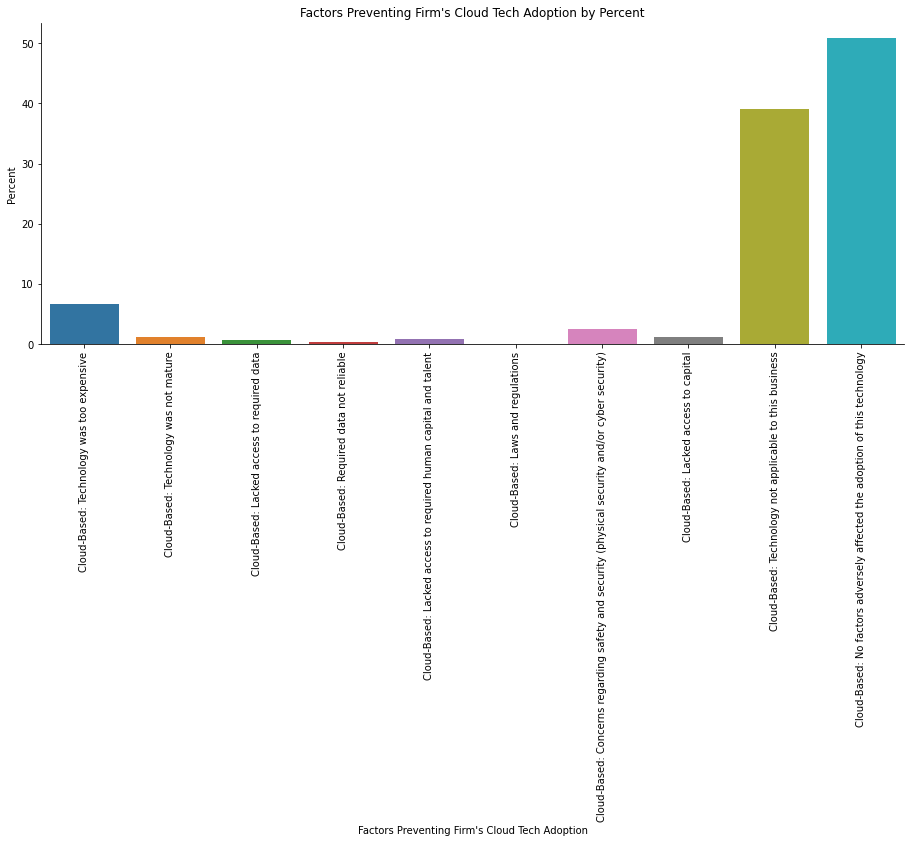

In [16]:
g = sns.factorplot(y='FIRMPDEMP_PCT', data=df_cloud, x='FACTORS_P_LABEL',\
               aspect=3, kind='bar')
g.set_xticklabels(rotation=90)
g.ax.set_title("Factors Preventing Firm's Cloud Tech Adoption by Percent")
g.set_ylabels("Percent")
g.set_xlabels("Factors Preventing Firm's Cloud Tech Adoption")

## Correlation

In [17]:
correlation = df_totalsectors[['FIRMPDEMP_PCT','EMP_PCT','PAYANN_PCT']].corr().round(4)
correlation

,FIRMPDEMP_PCT,EMP_PCT,PAYANN_PCT
FIRMPDEMP_PCT,1.0000,0.9961,0.9940
EMP_PCT,0.9961,1.0000,0.9993
PAYANN_PCT,0.9940,0.9993,1.0000


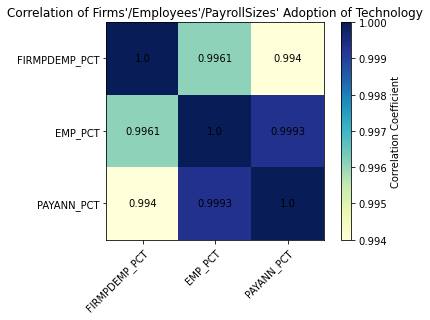

In [18]:
fig, ax = plt.subplots()
im = ax.imshow(correlation,cmap='YlGnBu')
fig.colorbar(im,ax=ax,label='Correlation Coefficient')
ax.set_xticks(np.arange(len(correlation.index)))
ax.set_yticks(np.arange(len(correlation.columns.values)))
ax.set_xticklabels(correlation.index)
ax.set_yticklabels(correlation.columns.values)
ax.tick_params(grid_alpha=0)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(correlation.index)):
    for j in range(len(correlation.index)):
        text = ax.text(j, i, correlation[correlation.index[i]][j],
                       ha="center", va="center")
ax.set_title("Correlation of Firms'/Employees'/PayrollSizes' Adoption of Technology")
plt.margins(0.5)
plt.show()

## Adoptation By Technology

In [19]:
df_cloud.FACTORS_P_LABEL.unique()

array(['Cloud-Based: Technology was too expensive',
       'Cloud-Based: Technology was not mature',
       'Cloud-Based: Lacked access to required data',
       'Cloud-Based: Required data not reliable',
       'Cloud-Based: Lacked access to required human capital and talent',
       'Cloud-Based: Laws and regulations',
       'Cloud-Based: Concerns regarding safety and security (physical security and/or cyber security)',
       'Cloud-Based: Lacked access to capital',
       'Cloud-Based: Technology not applicable to this business',
       'Cloud-Based: No factors adversely affected the adoption of this technology'],
      dtype=object)

In [20]:
df_totalsectors = idk[(idk['NAICS2017_LABEL']=='Total for all sectors') & (idk['NSFSZFI_LABEL'] == 'All firms') & (idk['SEX_LABEL'] == 'Total') & (idk['ETH_GROUP_LABEL'] == 'Total') & (idk['RACE_GROUP_LABEL'] == 'Total') & (idk['VET_GROUP_LABEL'] == 'Total')]
df_totalsectors['test'] = df_totalsectors.FACTORS_P_LABEL.apply(lambda x: x.endswith('No factors adversely affected the adoption of this technology'))
df_nofactors = df_totalsectors[df_totalsectors.test == True]
df_nofactors

<ipython-input-20-71d5db9367d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totalsectors['test'] = df_totalsectors.FACTORS_P_LABEL.apply(lambda x: x.endswith('No factors adversely affected the adoption of this technology'))


,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F,state,test
176,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T1E36R10,Artificial Intelligence: No factors adversely ...,2018,8122,None,42.6,None,0,W,0.0,S,119996,None,37.5,None,5431822,None,37.4,None,4.0,None,1.7,None,0.0,S,0.0,S,8.6,None,6.4,None,7.7,None,6.2,None,15,True
187,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T2E36R10,Cloud-Based: No factors adversely affected the...,2018,9686,None,50.9,None,0,W,0.0,S,163333,None,51.1,None,7604609,None,52.4,None,4.9,None,2.4,None,0.0,S,0.0,S,8.7,None,8.5,None,7.4,None,8.3,None,15,True
218,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T3E36R10,Specialized Software: No factors adversely aff...,2018,10075,None,52.9,None,0,W,0.0,S,170124,None,53.2,None,7737520,None,53.3,None,4.8,None,2.4,None,0.0,S,0.0,S,8.3,None,9.3,None,7.2,None,11.1,None,15,True
229,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T4E36R10,Robotics: No factors adversely affected the ad...,2018,7906,None,41.6,None,0,W,0.0,S,119454,None,37.5,None,5347696,None,37.0,None,3.8,None,1.5,None,0.0,S,0.0,S,8.6,None,7.1,None,7.6,None,6.3,None,15,True
249,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T5E36R10,Specialized Equipment: No factors adversely af...,2018,9073,None,47.6,None,0,W,0.0,S,140007,None,43.8,None,6416402,None,44.2,None,5.8,None,2.7,None,0.0,S,0.0,S,9.2,None,7.4,None,8.6,None,9.1,None,15,True


In [21]:
df_nofactors['FIRMPDEMP_PCT'] = df_nofactors['FIRMPDEMP_PCT'].astype(float)
df_nofactors['EMP_PCT'] = df_nofactors['EMP_PCT'].astype(float)
df_nofactors['PAYANN_PCT'] = df_nofactors['PAYANN_PCT'].astype(float)
df_nofactors['FIRM-EMP'] = df_nofactors['FIRMPDEMP_PCT'].astype(float)

<ipython-input-21-49c6e87d3b64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nofactors['FIRMPDEMP_PCT'] = df_nofactors['FIRMPDEMP_PCT'].astype(float)
<ipython-input-21-49c6e87d3b64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nofactors['EMP_PCT'] = df_nofactors['EMP_PCT'].astype(float)
<ipython-input-21-49c6e87d3b64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [22]:
df_nofactors['test'] = df_nofactors.FACTORS_P_LABEL.apply(lambda x: "Cloud-Based" if x.startswith("Cloud-Based:") else "Artificial Intelligence" if x.startswith("Artificial Intelligence") else "Specialized Software" if x.startswith("Specialized Software") else "Robotics" if x.startswith("Robotics") else "Specialized Equipment" if x.startswith("Specialized Equipment") else 0)
df_nofactors

<ipython-input-22-21965527a49f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nofactors['test'] = df_nofactors.FACTORS_P_LABEL.apply(lambda x: "Cloud-Based" if x.startswith("Cloud-Based:") else "Artificial Intelligence" if x.startswith("Artificial Intelligence") else "Specialized Software" if x.startswith("Specialized Software") else "Robotics" if x.startswith("Robotics") else "Specialized Equipment" if x.startswith("Specialized Equipment") else 0)


,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F,state,test,FIRM-EMP
176,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T1E36R10,Artificial Intelligence: No factors adversely ...,2018,8122,None,42.6,None,0,W,0.0,S,119996,None,37.5,None,5431822,None,37.4,None,4.0,None,1.7,None,0.0,S,0.0,S,8.6,None,6.4,None,7.7,None,6.2,None,15,Artificial Intelligence,42.6
187,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T2E36R10,Cloud-Based: No factors adversely affected the...,2018,9686,None,50.9,None,0,W,0.0,S,163333,None,51.1,None,7604609,None,52.4,None,4.9,None,2.4,None,0.0,S,0.0,S,8.7,None,8.5,None,7.4,None,8.3,None,15,Cloud-Based,50.9
218,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T3E36R10,Specialized Software: No factors adversely aff...,2018,10075,None,52.9,None,0,W,0.0,S,170124,None,53.2,None,7737520,None,53.3,None,4.8,None,2.4,None,0.0,S,0.0,S,8.3,None,9.3,None,7.2,None,11.1,None,15,Specialized Software,52.9
229,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T4E36R10,Robotics: No factors adversely affected the ad...,2018,7906,None,41.6,None,0,W,0.0,S,119454,None,37.5,None,5347696,None,37.0,None,3.8,None,1.5,None,0.0,S,0.0,S,8.6,None,7.1,None,7.6,None,6.3,None,15,Robotics,41.6
249,0400000US15,Hawaii,00,Total for all sectors,001,Total,001,Total,00,Total,001,Total,001,All firms,T5E36R10,Specialized Equipment: No factors adversely af...,2018,9073,None,47.6,None,0,W,0.0,S,140007,None,43.8,None,6416402,None,44.2,None,5.8,None,2.7,None,0.0,S,0.0,S,9.2,None,7.4,None,8.6,None,9.1,None,15,Specialized Equipment,47.6


C:\Users\tpanf_fex23s3\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


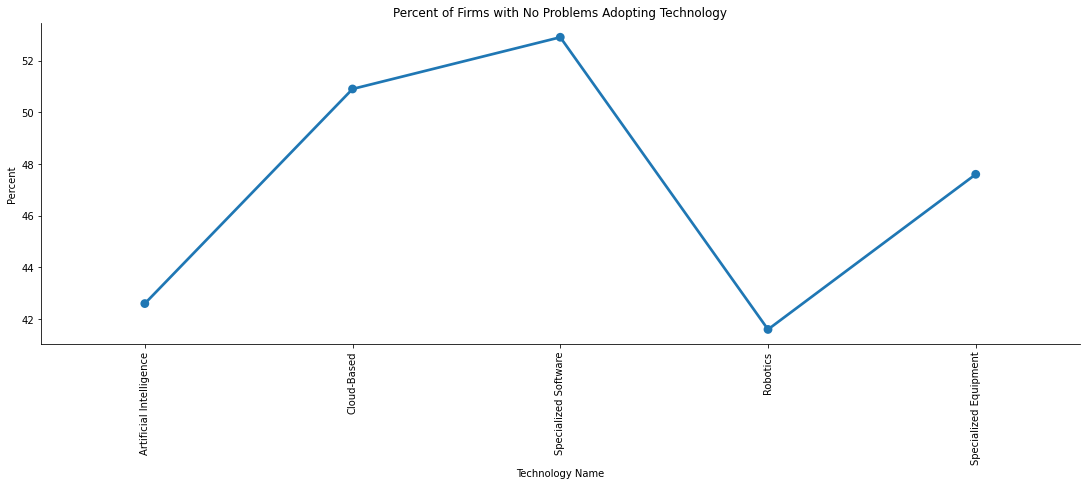

In [23]:
g = sns.factorplot(y='FIRMPDEMP_PCT', data=df_nofactors, x='test',\
               aspect=3)
g.set_xticklabels(rotation=90)
g.ax.set_title("Percent of Firms with No Problems Adopting Technology")
g.set_ylabels("Percent")
g.set_xlabels("Technology Name")